# Notes
Jake Mitchell

- Year, county are useless.  Year is all the same, county is a primary key
- west, central, and urban are binary.  We will have to treat them differently
- important measures are crmrte, prbarr, prbconv, prbpris
- I would like to use the top 4 columns across all of our analysis, ie, everything has a relationship to the 4 variables<br> ex. (0.25, 0.15, 0.5, 0.01)
- 

#### Questions
? Are we looking at only things that the politcal campaign can change or all factors?

In [16]:
library('stats')
library('dplyr')
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(ggpubr)


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 30)
options(repr.plot.width=10, repr.plot.height=10)

In [17]:
df = read.csv("crime_v2.csv")
dfNA = df[!complete.cases(df),]
df = df[complete.cases(df),]
df$avgSenGConv = df$avgsen * df$prbpris
df$prbConvGCrime = df$prbarr * df$prbconv
df$wage = (df$wcon + df$wtuc + df$wtrd + df$wfir + df$wser + df$wmfg + df$wfed + df$wsta + df$wloc)/9
df$taxPct = df$taxpc/df$wage
df$logPolPc = log(df$polpc)

dfNum = subset(df, select=-c(year, county))

In [18]:
summary(df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

In [19]:
df

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,avgSenGConv,prbConvGCrime,wage,taxPct,logPolPc
1,87,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,0,1,0,20.21870,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097,2.926701,0.15736605,339.4322,0.09131036,-6.304609
3,87,0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694,2.857500,0.19559832,294.7643,0.09123247,-7.200946
5,87,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,1,0,0,3.16053,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538,4.056000,0.11904743,283.7386,0.12270466,-6.697243
7,87,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,0,1,0,47.91610,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726,3.109356,0.19165367,313.6815,0.13691464,-6.482527
9,87,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,1,0,0,1.79619,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755,3.638361,0.24696400,306.5820,0.09150812,-7.058369
11,87,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,1,0,0,1.54070,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920,6.500000,0.03587448,287.3655,0.12259557,-5.849260
13,87,0.0296409,0.365004,0.5206070,0.420833,10.55,0.00133771,0.5169492,30.69649,0,0,0,32.17940,238.3064,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344,4.439788,0.19002364,307.4884,0.09982975,-6.616796
15,87,0.0202814,0.392111,0.7692310,0.507692,10.64,0.00103525,0.3009986,34.00304,0,0,0,61.05400,253.5926,353.2182,199.2377,356.1254,206.2816,235.05,416.49,370.62,297.13,0.23495702,0.07430546,5.401843,0.30162395,298.6384,0.11386024,-6.873112
17,87,0.0304289,0.251599,0.4364410,0.436893,7.32,0.00129761,0.3503982,34.96204,0,0,0,40.38900,193.6432,346.6011,202.9595,268.3363,208.2520,339.76,389.51,322.06,278.39,0.21818182,0.07769163,3.198057,0.10980813,283.2791,0.12341904,-6.647231
19,87,0.0221567,0.162860,1.2256100,0.333333,10.34,0.00202425,0.5767442,61.15251,0,0,0,24.31170,260.1381,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232,3.446663,0.19960285,349.9108,0.17476602,-6.202556


In [20]:
df[,c("county","taxPct")]

county,taxPct
1,0.09131036
3,0.09123247
5,0.12270466
7,0.13691464
9,0.09150812
11,0.12259557
13,0.09982975
15,0.11386024
17,0.12341904
19,0.17476602


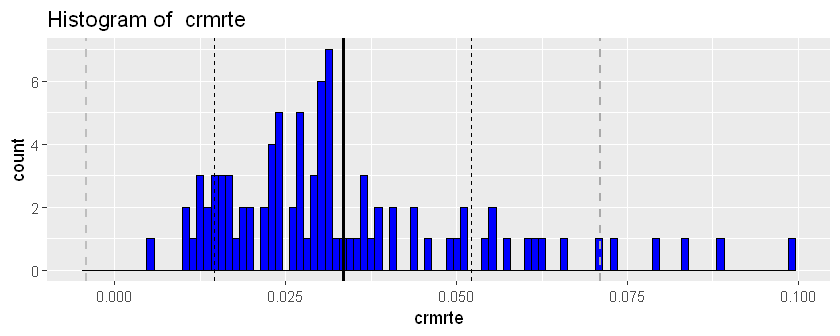

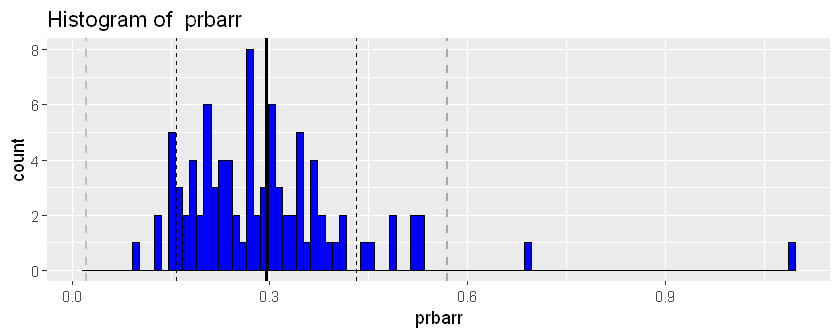

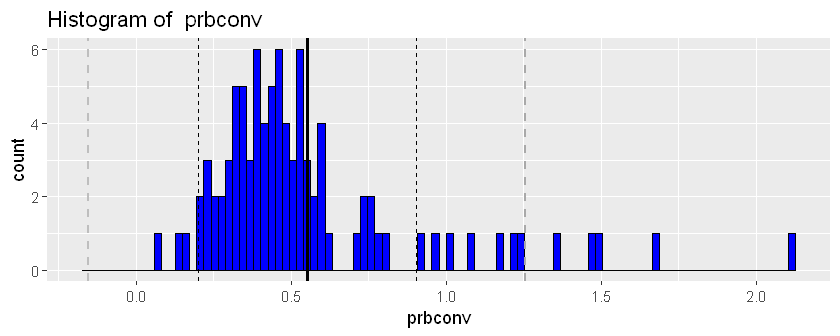

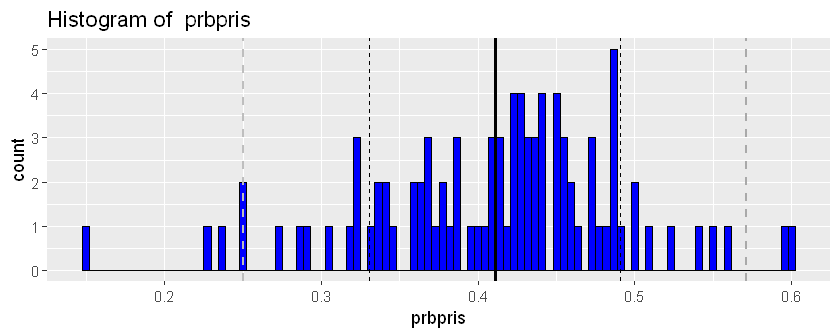

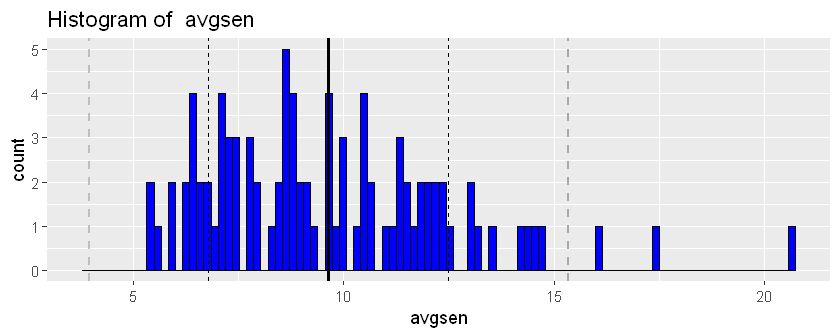

In [21]:
for (name in names(dfNum)[1:5]) {
#     hist(as.numeric(df[,name]), breaks=100, main = paste("Histogram of",name) )
    plot(FancyHist(dfNum, name, color="blue"))
}

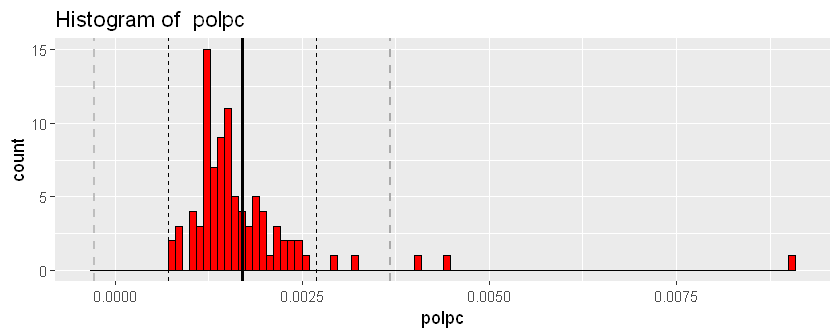

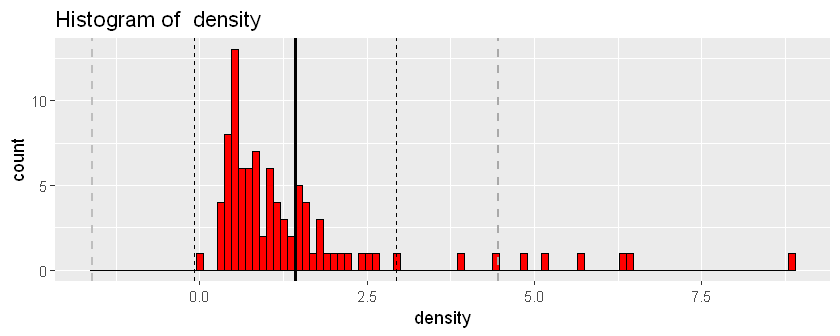

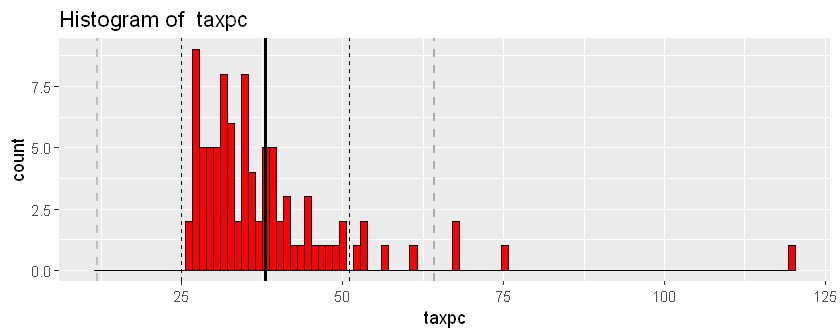

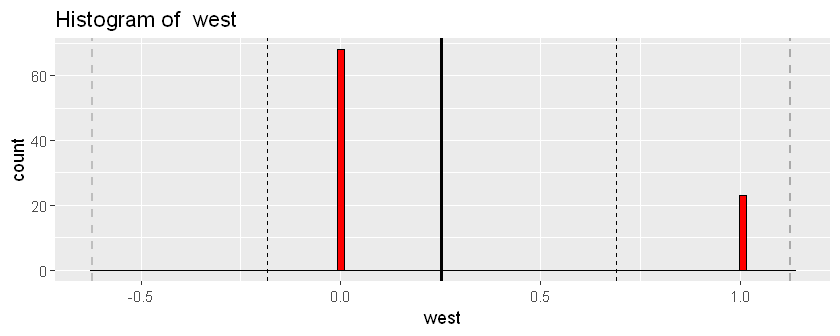

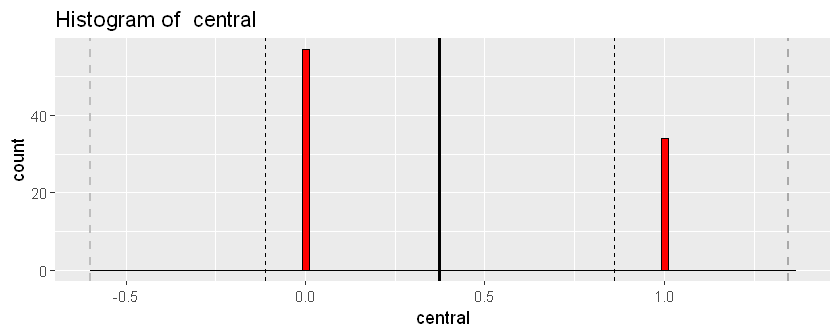

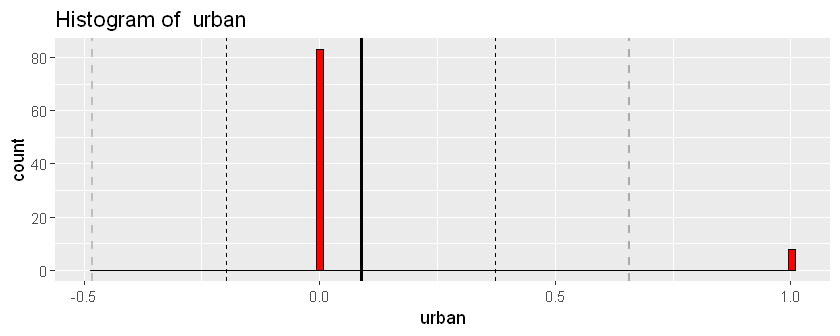

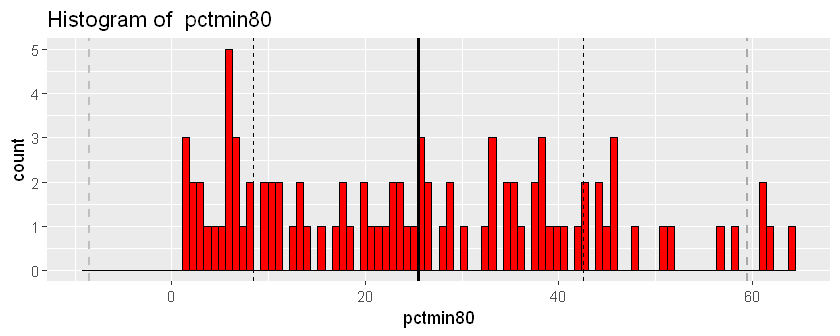

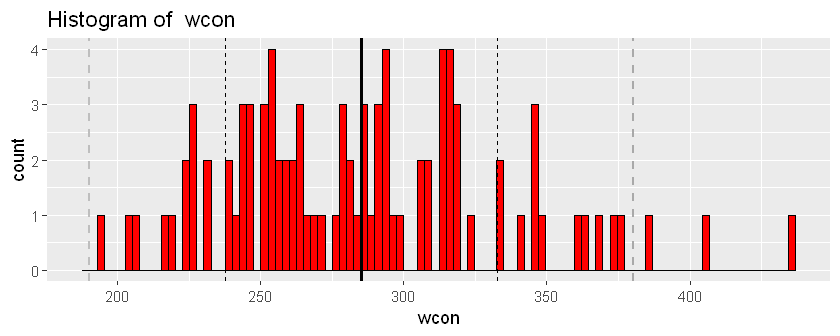

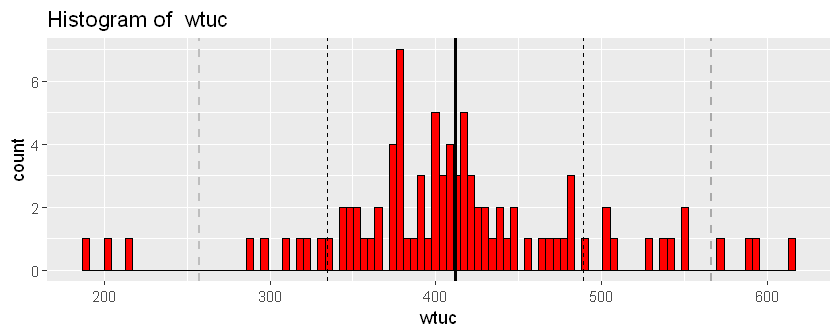

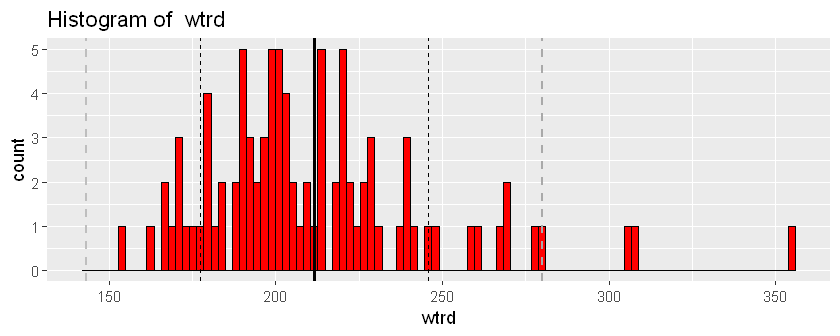

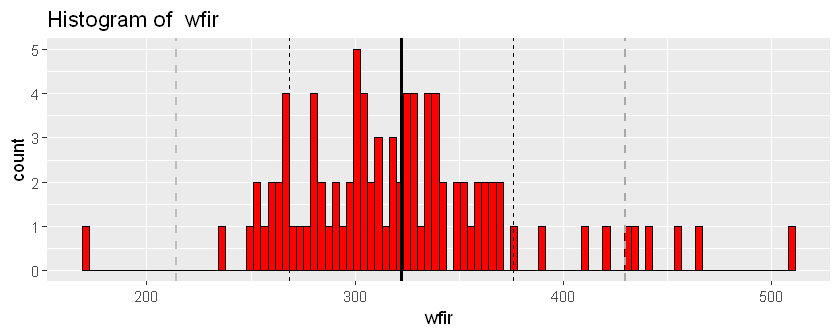

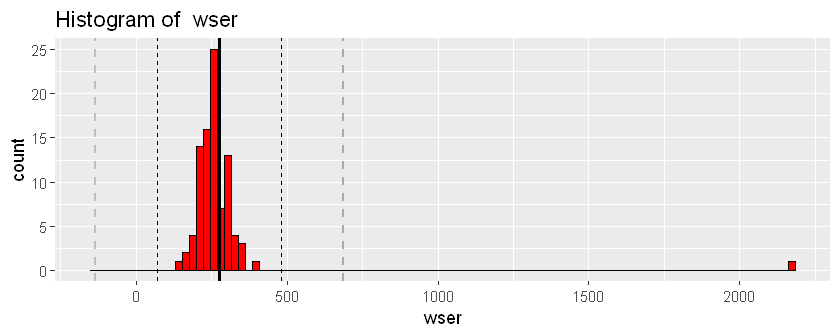

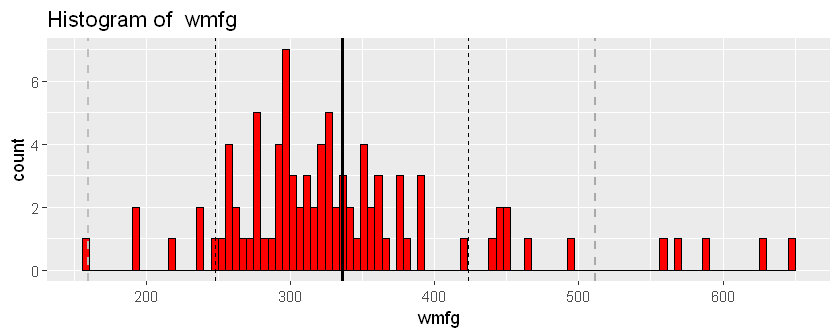

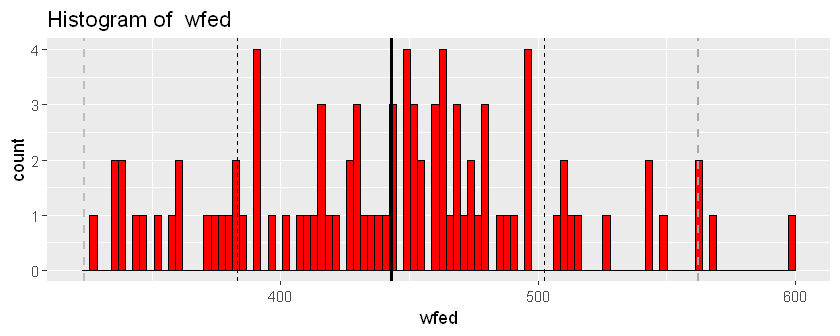

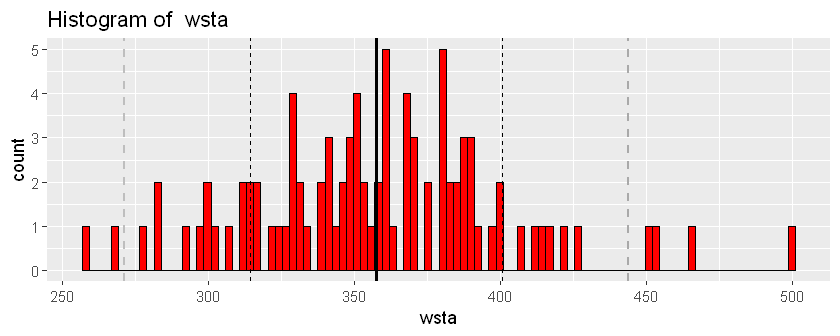

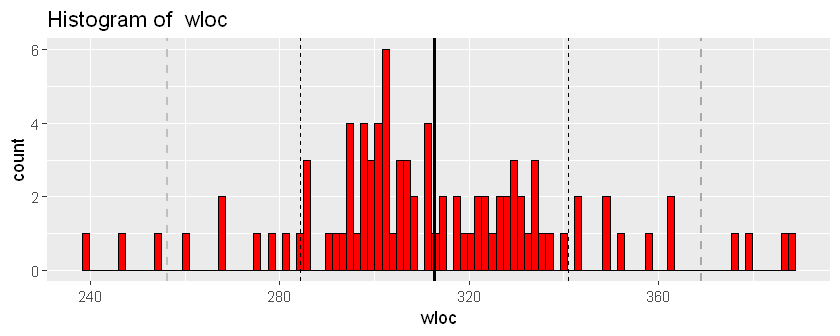

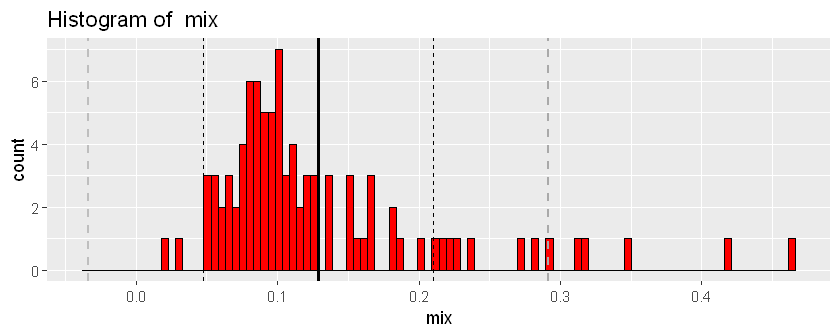

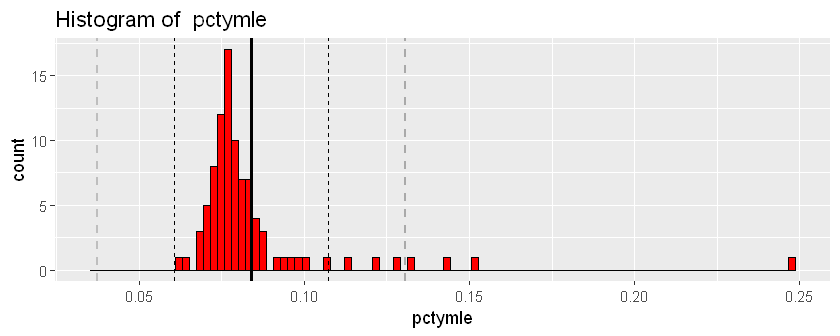

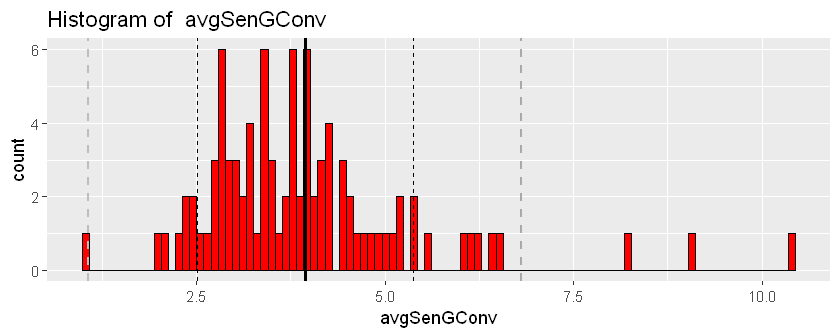

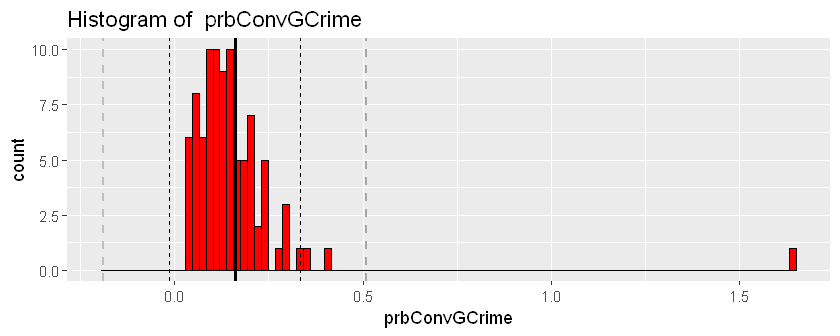

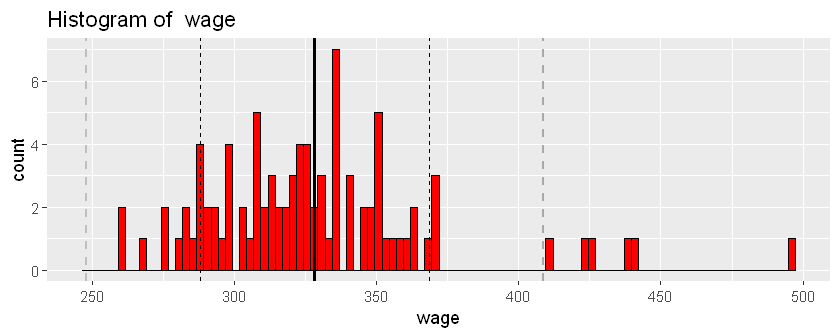

In [22]:
for (name in names(dfNum)[6:26]) {
#     hist(as.numeric(df[,name]), breaks=100, main = paste("Histogram of",name) )
    plot(FancyHist(dfNum, name))
}

Warning message:
"Removed 9555 rows containing non-finite values (stat_smooth)."

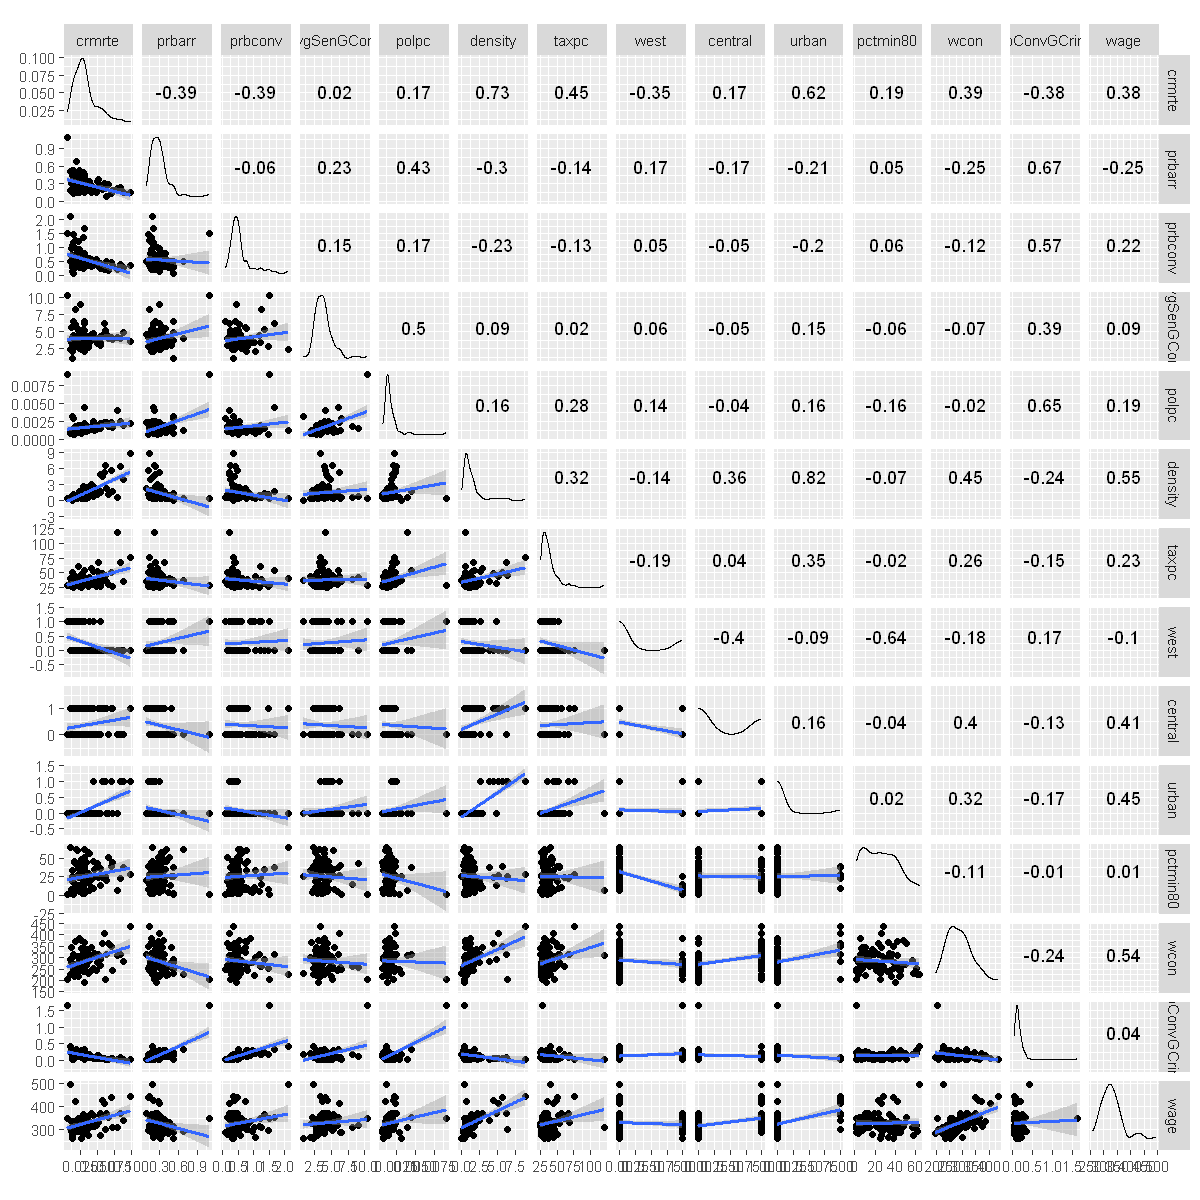

In [23]:
options(repr.plot.width=10, repr.plot.height=10)
ggscatmat(dfNum[c(1,2,3,24,6,7,8,9,10,11,12,13,25,26)]) +
geom_smooth(method="lm")

- Surprisingly crimerate interacts quite oddly with the other "Dependant" variables.  For example as the crime rate goes up, the proability of arrest and conviction goes down.  Now I'm not sure if this is because of an understaffing of police or what, but it is a strange one.
- Crime rate goes up a lot with urban/density.
- My engineered avgSenGConv has almost no correlation to anything

Warning message:
"Removed 10920 rows containing non-finite values (stat_smooth)."

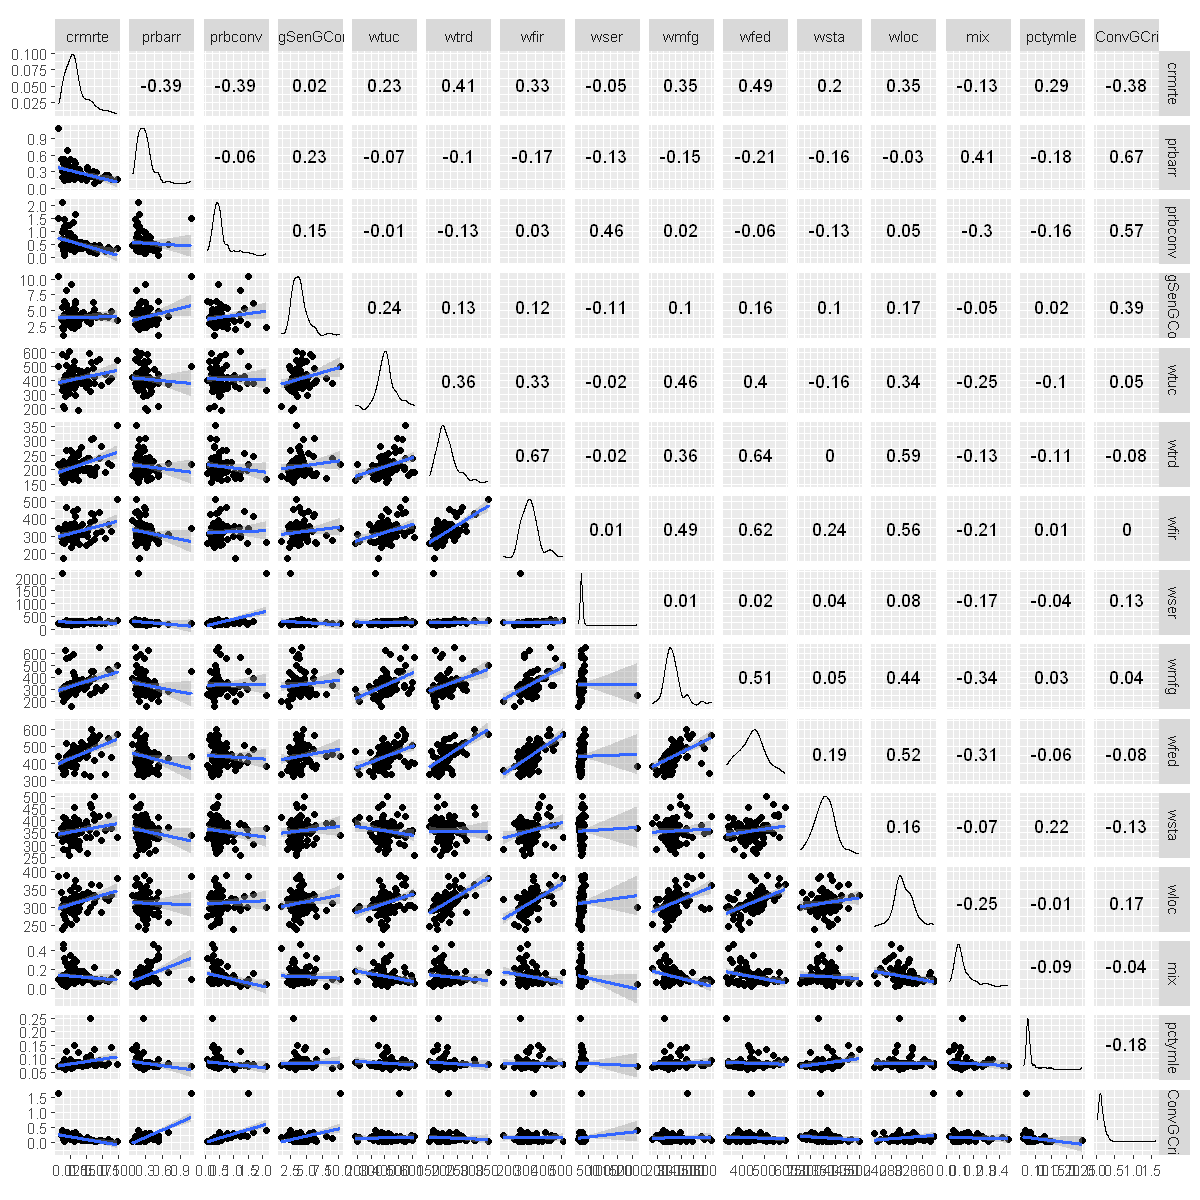

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
ggscatmat(dfNum[c(1,2,3,24,14,15,16,17,18,19,20,21,22,23,25)]) +
geom_smooth(method="lm")

- Crime rate has a medium correlation to the federal wage in that county
- Crime rate has a medium correlation with general wage in that county, but not as much as federal wage
- Service wage and probability of conviction
- The mix seems to only have a correlation on the probability of being arrested.  This makes sense because it means that someone has an id of who did it.
- 

In [25]:
df[df$county == 115,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,avgSenGConv,prbConvGCrime,wage,taxPct,logPolPc
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,1,0,0,1.28365,204.2206,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495,10.35,1.636365,347.7498,0.08107295,-4.704512


While there is a lot of skew and certain outliers in many of these I don't believe transformations such as logs and such will be required to get meaningful results out of the data set.  In addition many of the outliers come from the same county, county 115.  It has a probability of conviction of 1.09 meaning more people are convicted than are arrested.  It also has a very high probability of prison with 50% of convictions getting jail time.  It even has a high prison sentence length of 20.70.<br><br>
Given the round numbers across this data point, I believe that this is from a small county, meaning that it's results are nor large enough for probability to take effect over randomness.

### Analysis of What to Measure
As mentioned in the write up there are two things that we will care about, the certainty of punishment and the severity of punishment.  The certainty of punishment is given by the probability of arrest (prbarr), and probability of conviction "prbconv".  The severity is given by 2 values corresponding to aspects of punishment, the probability of prison sentence (prbpris) and the average sentence length (avgsen). 
<br><br>
I want to attempt a couple of engineered features to see if I can an aggregate variable.  I want to:<br>
- Get the average sentence per conviction (prbpris * avgsen).  This will give me the average punishment if someone is given punishment.  <br>
-  Get the average wage accross all measured jobs<br>

- Dependant variables we care about
    - Crime rate, this is the thing a political campaign would want to decrease the most
    - Probabilities of arrest and conviciton will give the certainty of punishment
        - Could be made 1 variable by mulitplying the two, giving prob conviction given a crime
    - Probabilities of prison and the average sentence will give the severity of punishment
        - Can be given by the average sentence length given a conviction
        
- Independant variables that may be interesting
    - Police per capita may have interesting relationships
    - The general wage
        - Federal Wage
    - tax pc / taxPct
    - Density
    
- Independant variables that should be ommitted
    - The west and central values
    - Urban, because density is more useful
    - 

### 2. What covariates help you identify a causal effect? What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?

- All of the different wage stats will make this difficult.  They have a decent amount of colinearity because it is representative of how much people get paid.  
- The density and urban stats are very closely related, which means that any information by one will be diluted between the two
- Wages are closely related to the density of an area, wages are higher in the city than outside, which means the crime/wage relationship will be difficult to measure as it is heavily influeced by density.
- Taxpc and wage are closely related.
    - Could feature engineer here? 

### 3. What transformations should you apply to each variable? This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.

### 4. Are your choices supported by EDA? You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be interspersed with your model building. Use visual tools to guide your decisions.

### At a minimum, you should include the following three specifications:

#### One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.


Call:
lm(formula = crmrte ~ prbConvGCrime, data = df)

Coefficients:
  (Intercept)  prbConvGCrime  
      0.03994       -0.04090  



Call:
lm(formula = crmrte ~ prbConvGCrime, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024134 -0.011071 -0.004451  0.005990  0.061146 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.039940   0.002497  15.995  < 2e-16 ***
prbConvGCrime -0.040899   0.010589  -3.862 0.000213 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01751 on 89 degrees of freedom
Multiple R-squared:  0.1436,	Adjusted R-squared:  0.1339 
F-statistic: 14.92 on 1 and 89 DF,  p-value: 0.0002127


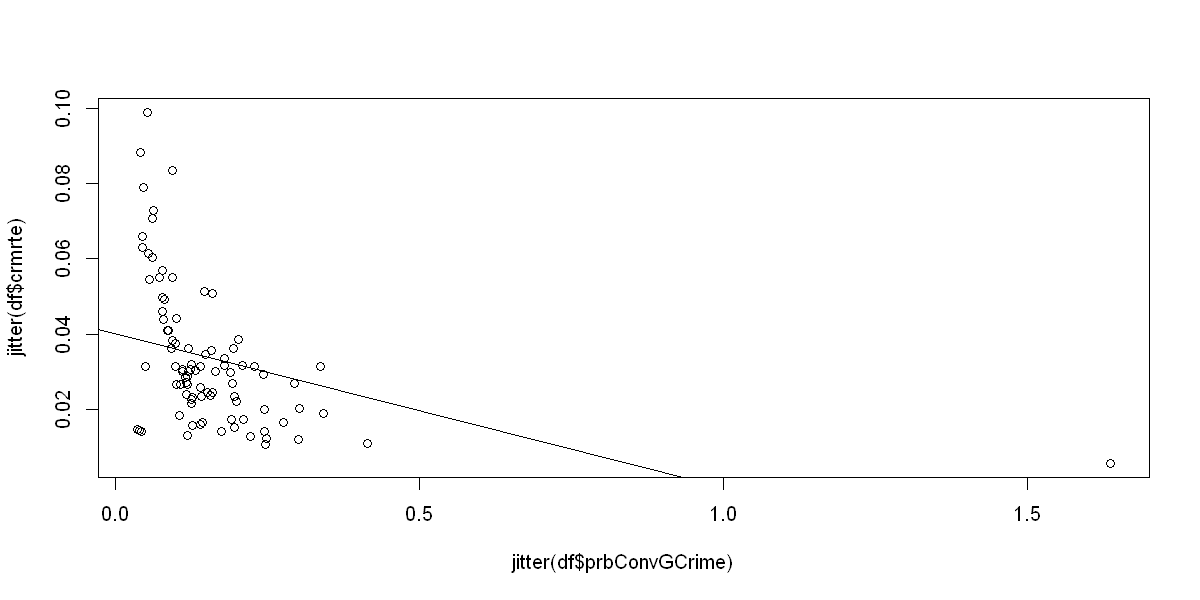

(Intercept) prbConvGCrime 
 6.235006e-06  1.121331e-04

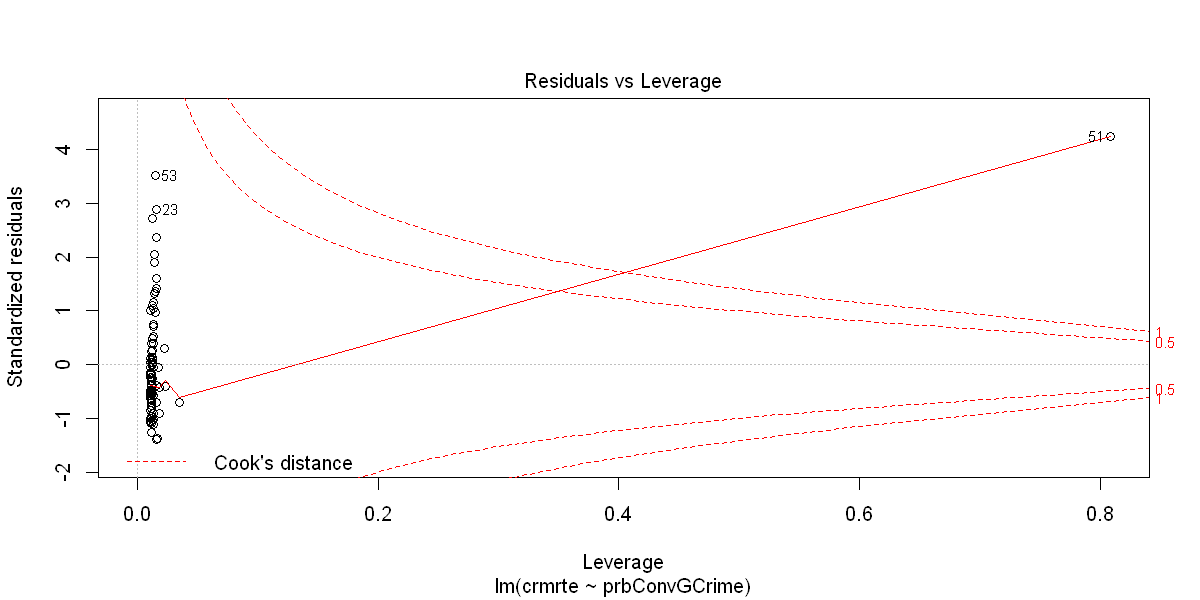

In [27]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$prbConvGCrime), jitter(df$crmrte))
(modelCer <- lm(crmrte ~ prbConvGCrime, data = df))
abline(modelCer)
summary(modelCer)
plot(modelCer, which = 5)
diag(vcov(modelCer))


Call:
lm(formula = prbarr ~ polpc, data = df)

Coefficients:
(Intercept)        polpc  
     0.1942      59.1684  



Call:
lm(formula = prbarr ~ polpc, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25665 -0.09083 -0.01210  0.07037  0.42290 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19420    0.02614   7.430 6.33e-11 ***
polpc       59.16843   13.30308   4.448 2.50e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1246 on 89 degrees of freedom
Multiple R-squared:  0.1819,	Adjusted R-squared:  0.1727 
F-statistic: 19.78 on 1 and 89 DF,  p-value: 2.499e-05


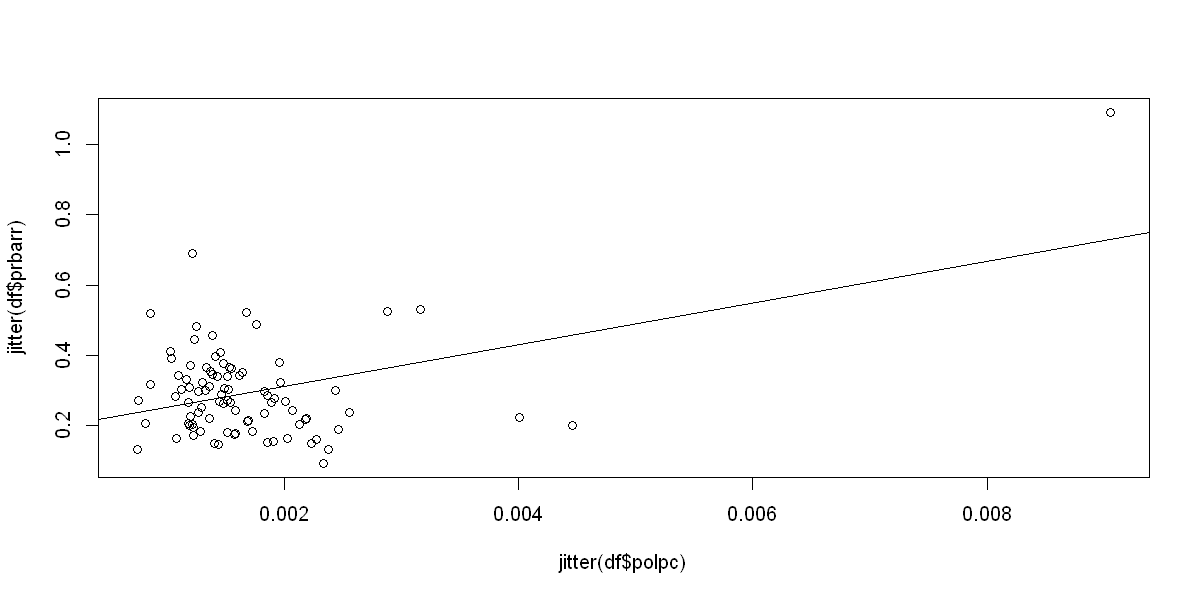

(Intercept)        polpc 
6.832410e-04 1.769719e+02

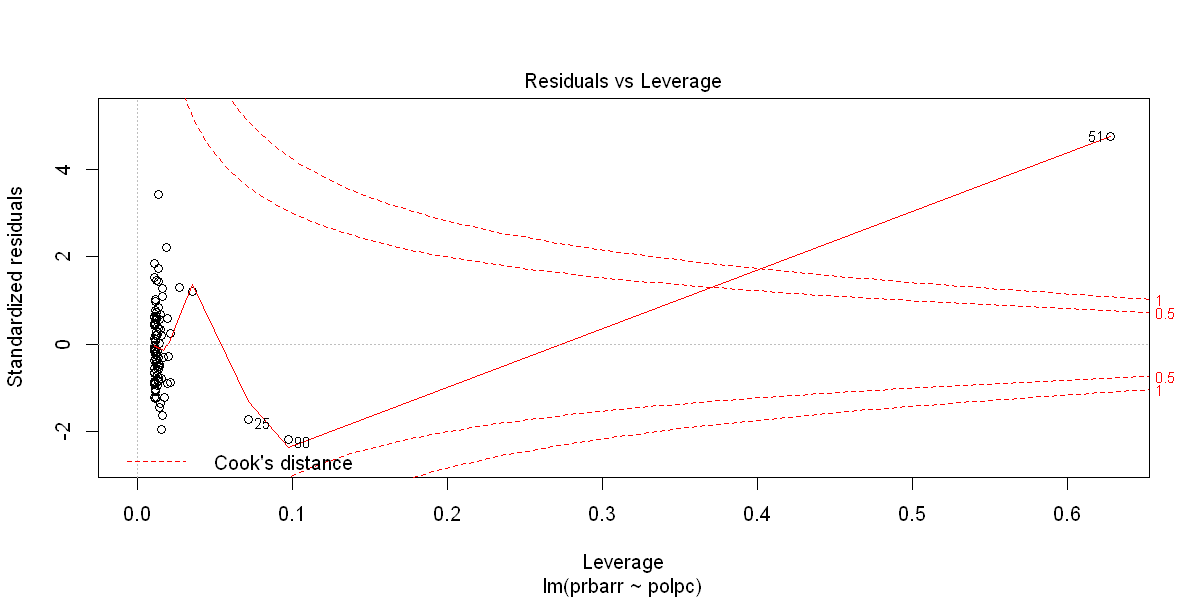

In [28]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$polpc), jitter(df$prbarr))
(modelPol <- lm(prbarr ~ polpc, data = df))
abline(modelPol)
summary(modelPol)
plot(modelPol, which = 5)
diag(vcov(modelPol))


Call:
lm(formula = prbarr ~ logPolPc, data = df)

Coefficients:
(Intercept)     logPolPc  
     0.8099       0.0797  



Call:
lm(formula = prbarr ~ logPolPc, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23430 -0.09691 -0.02096  0.06438  0.65596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.80988    0.24562   3.297   0.0014 **
logPolPc     0.07970    0.03795   2.100   0.0386 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1344 on 89 degrees of freedom
Multiple R-squared:  0.04721,	Adjusted R-squared:  0.03651 
F-statistic:  4.41 on 1 and 89 DF,  p-value: 0.03856


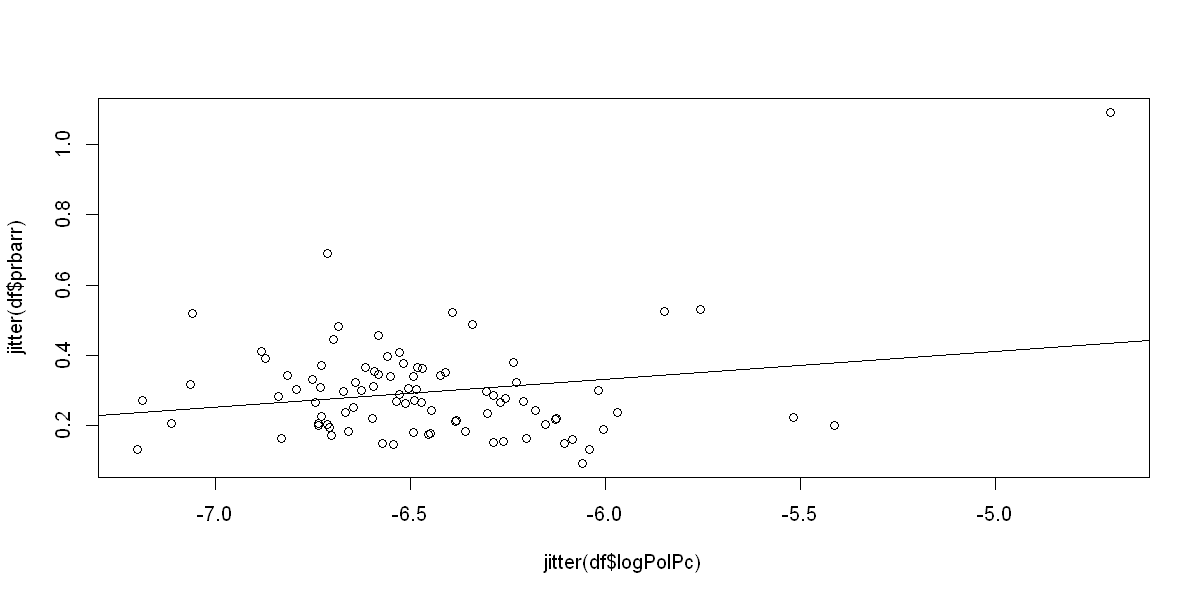

(Intercept)    logPolPc 
0.060331438 0.001440222

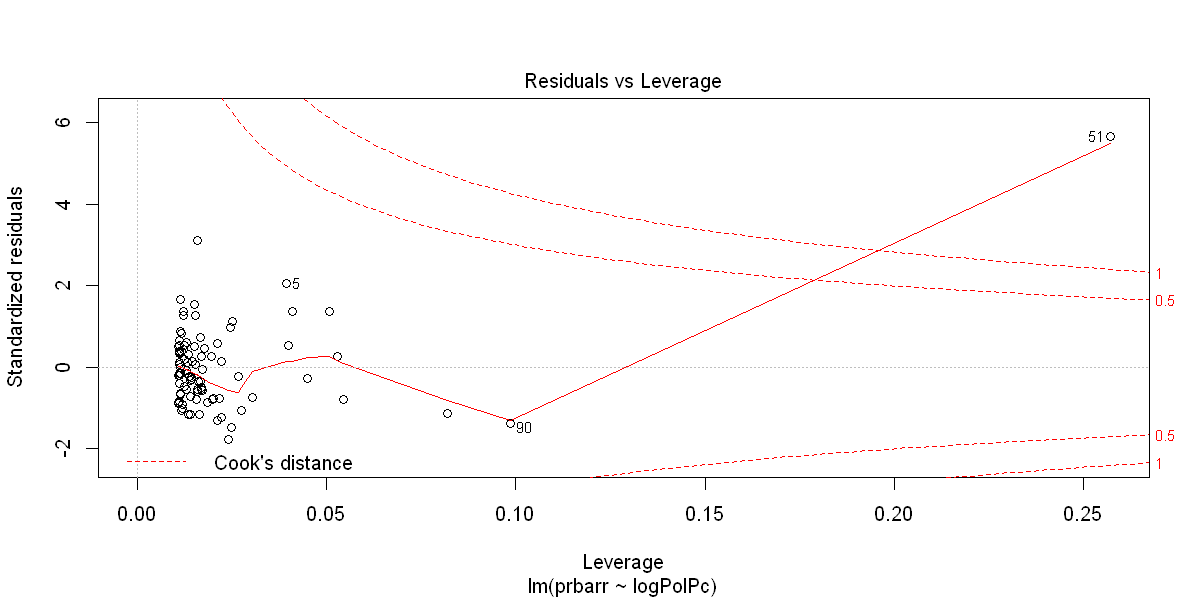

In [29]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$logPolPc), jitter(df$prbarr))
(modelLogPol <- lm(prbarr ~ logPolPc, data = df))
abline(modelLogPol)
summary(modelLogPol)
plot(modelLogPol, which = 5)
diag(vcov(modelLogPol))


Call:
lm(formula = crmrte ~ wfed, data = df)

Coefficients:
(Intercept)         wfed  
 -0.0344698    0.0001532  



Call:
lm(formula = crmrte ~ wfed, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027760 -0.010726 -0.004562  0.005073  0.061552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0344698  0.0130473  -2.642  0.00974 ** 
wfed         0.0001532  0.0000292   5.248 1.03e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01653 on 89 degrees of freedom
Multiple R-squared:  0.2363,	Adjusted R-squared:  0.2278 
F-statistic: 27.55 on 1 and 89 DF,  p-value: 1.032e-06


[1] -484.4403

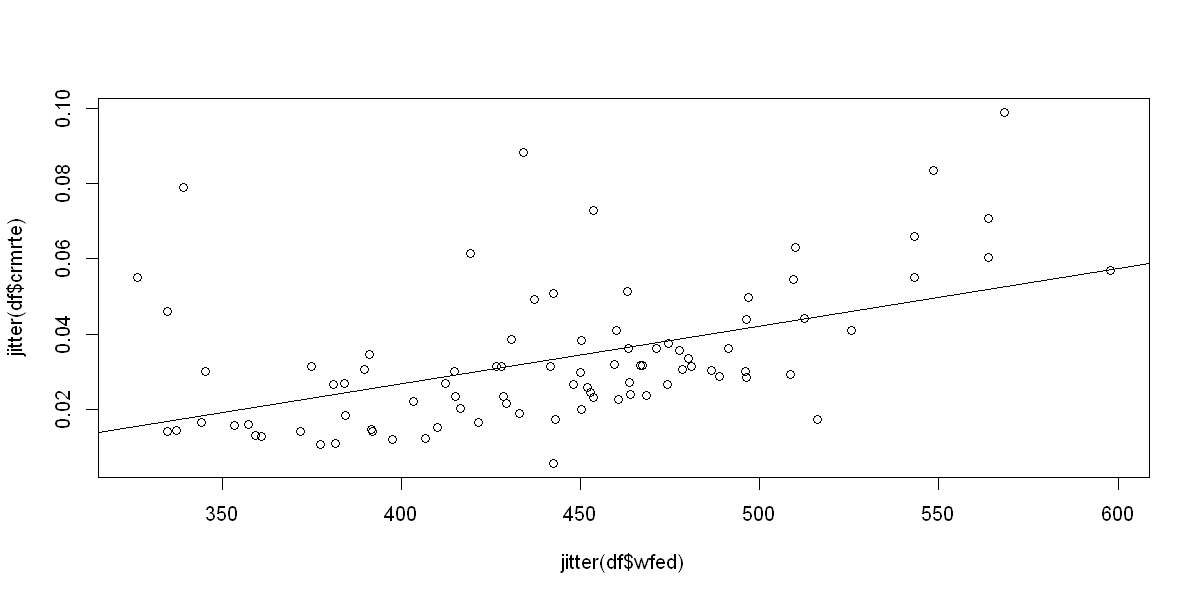

(Intercept)         wfed 
1.702317e-04 8.525087e-10

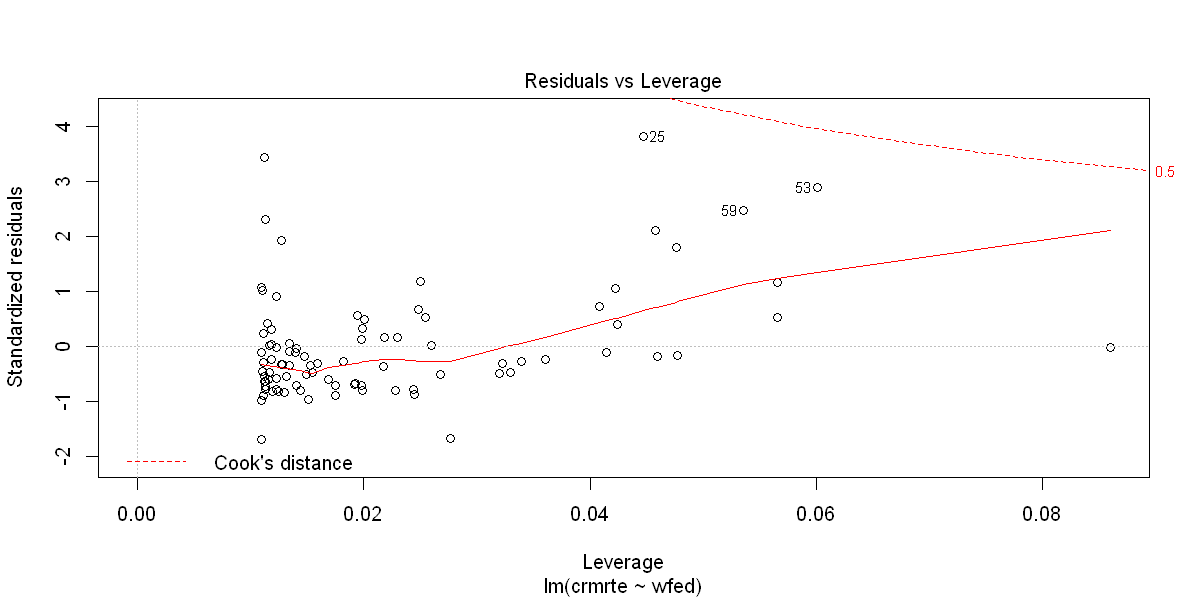

In [30]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$wfed), jitter(df$crmrte))
(modelWFed <- lm(crmrte ~ wfed, data = df))
abline(modelWFed)
summary(modelWFed)
AIC(modelWFed)
plot(modelWFed, which = 5)
diag(vcov(modelWFed))


Call:
lm(formula = crmrte ~ wage, data = df)

Coefficients:
(Intercept)         wage  
 -0.0244211    0.0001761  



Call:
lm(formula = crmrte ~ wage, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.052053 -0.010359 -0.004068  0.006841  0.052757 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.442e-02  1.521e-02  -1.605 0.111931    
wage         1.761e-04  4.599e-05   3.829 0.000239 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01753 on 89 degrees of freedom
Multiple R-squared:  0.1415,	Adjusted R-squared:  0.1318 
F-statistic: 14.66 on 1 and 89 DF,  p-value: 0.0002387


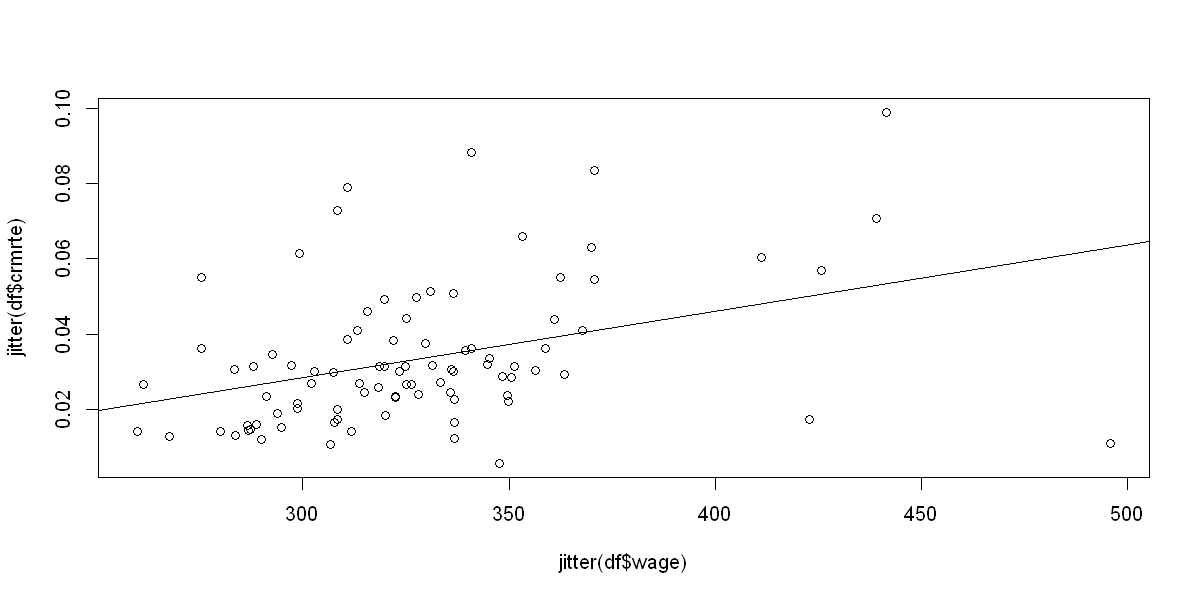

(Intercept)         wage 
2.313786e-04 2.115092e-09

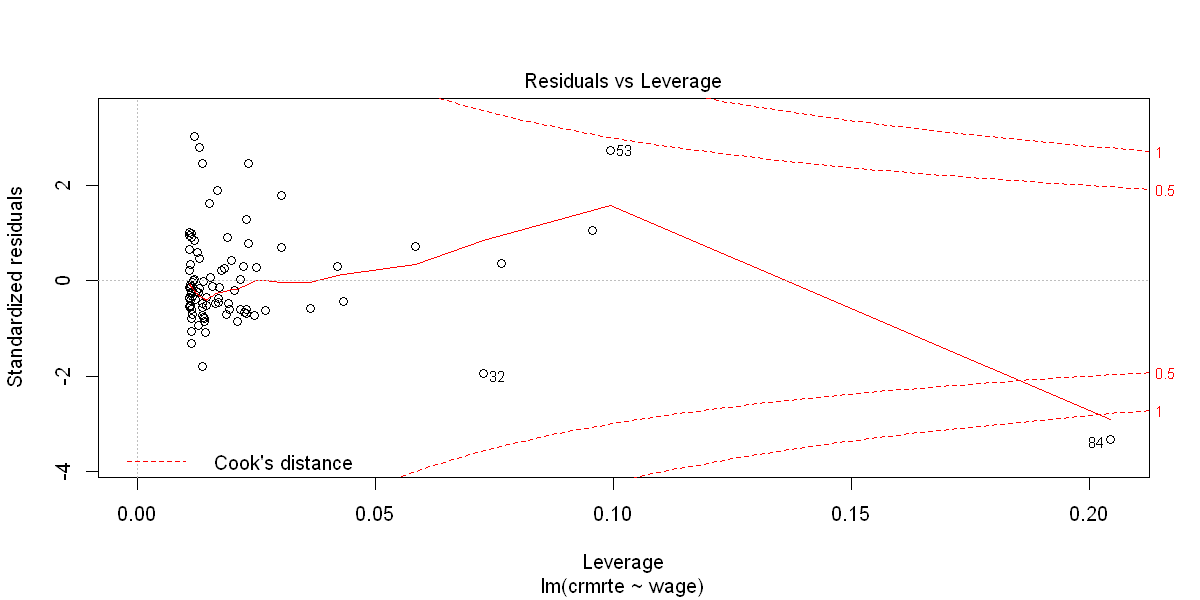

In [31]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$wage), jitter(df$crmrte))
(modelWage <- lm(crmrte ~ wage, data = df))
abline(modelWage)
summary(modelWage)
plot(modelWage, which = 5)
diag(vcov(modelWage))


Call:
lm(formula = crmrte ~ taxPct, data = df)

Coefficients:
(Intercept)       taxPct  
    0.01708      0.14013  



Call:
lm(formula = crmrte ~ taxPct, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028214 -0.011538 -0.002868  0.006381  0.057882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.017076   0.005946   2.872  0.00510 **
taxPct      0.140128   0.048379   2.896  0.00475 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01808 on 89 degrees of freedom
Multiple R-squared:  0.08614,	Adjusted R-squared:  0.07588 
F-statistic:  8.39 on 1 and 89 DF,  p-value: 0.004749


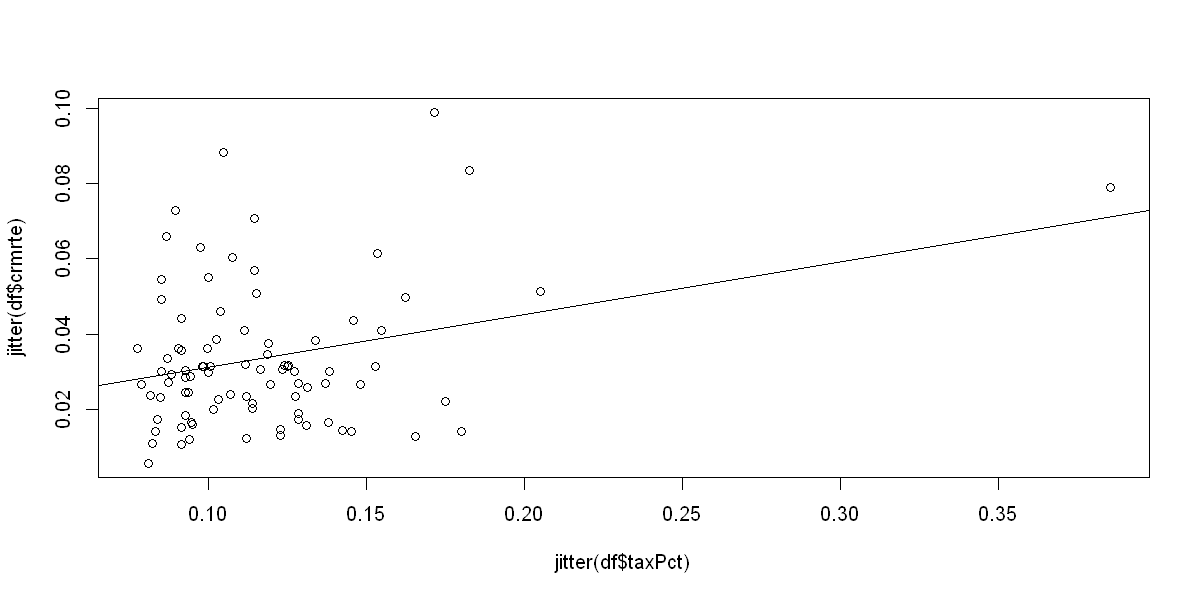

(Intercept)       taxPct 
0.0000353551 0.0023405286

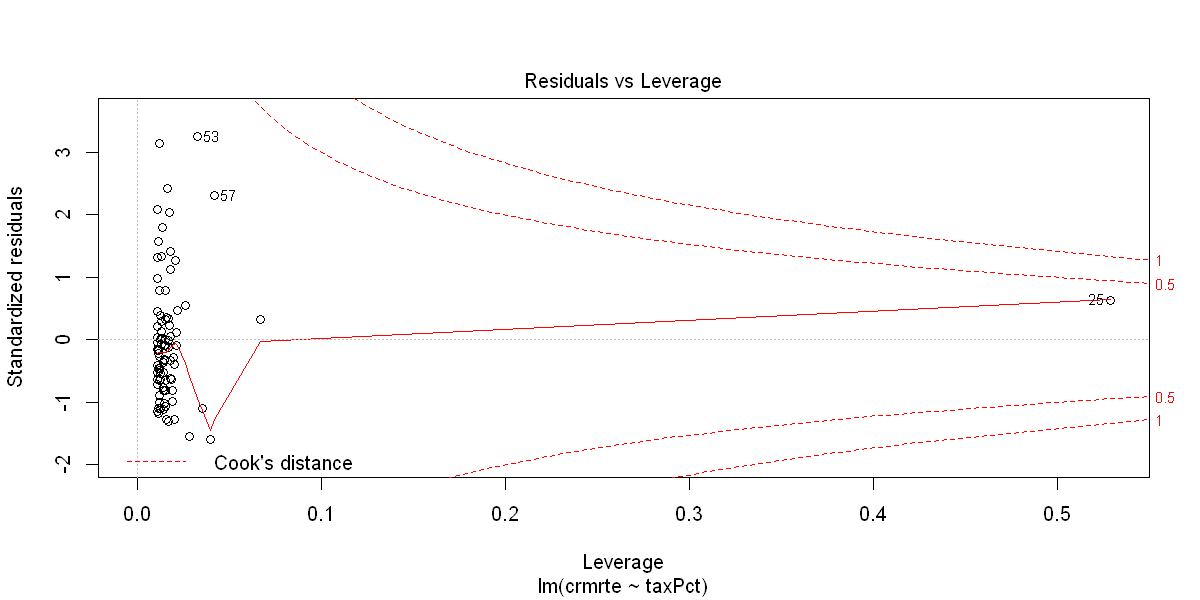

In [32]:
options(repr.plot.width=10, repr.plot.height=5)
plot(jitter(df$taxPct), jitter(df$crmrte))
(modelTaxPct <- lm(crmrte ~ taxPct, data = df))
abline(modelTaxPct)
summary(modelTaxPct)
plot(modelTaxPct, which = 5)
diag(vcov(modelTaxPct))


Call:
lm(formula = crmrte ~ taxPct + polpc, data = df)

Coefficients:
(Intercept)       taxPct        polpc  
    0.01487      0.12845      2.09851  



Call:
lm(formula = crmrte ~ taxPct + polpc, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038746 -0.011155 -0.002119  0.006268  0.057412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.014865   0.006297   2.361   0.0205 *
taxPct      0.128447   0.049585   2.590   0.0112 *
polpc       2.098509   1.979461   1.060   0.2920  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01807 on 88 degrees of freedom
Multiple R-squared:  0.09767,	Adjusted R-squared:  0.07716 
F-statistic: 4.763 on 2 and 88 DF,  p-value: 0.01087


(Intercept)       taxPct        polpc 
3.965671e-05 2.458672e-03 3.918265e+00

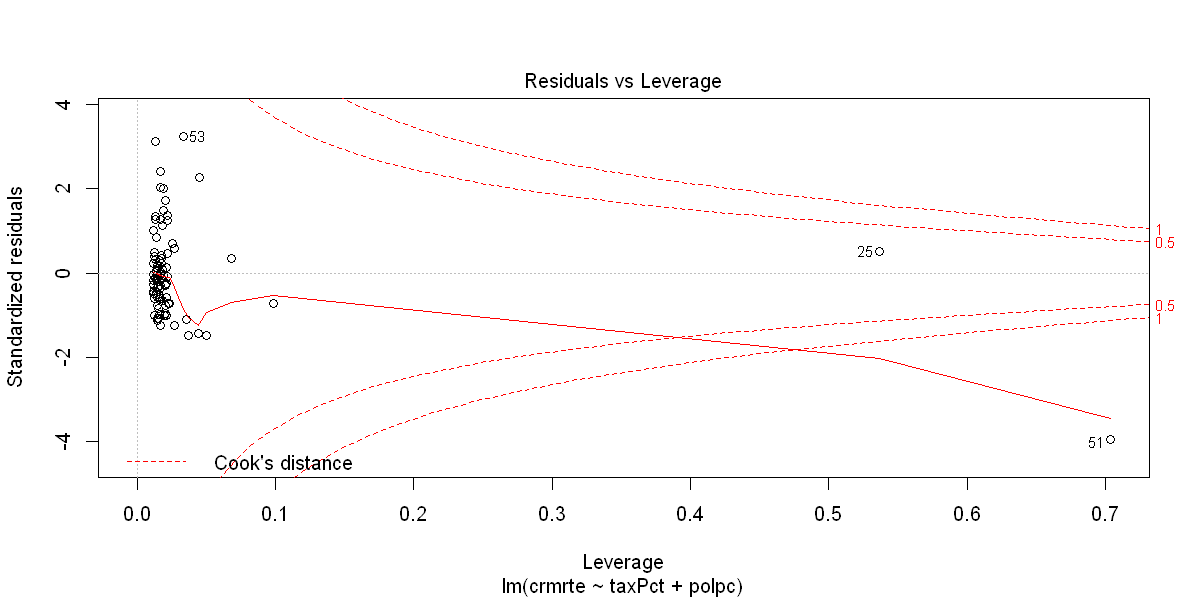

In [38]:
(modelGov <- lm(crmrte ~ taxPct + polpc, data = df))

summary(modelGov)
plot(modelGov, which = 5)
diag(vcov(modelGov))


Call:
lm(formula = crmrte ~ density, data = df)

Coefficients:
(Intercept)      density  
   0.020463     0.009054  



Call:
lm(formula = crmrte ~ density, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018423 -0.009392 -0.002907  0.004790  0.053922 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0204632  0.0018711   10.94  < 2e-16 ***
density     0.0090542  0.0009013   10.05 2.57e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01295 on 89 degrees of freedom
Multiple R-squared:  0.5314,	Adjusted R-squared:  0.5261 
F-statistic: 100.9 on 1 and 89 DF,  p-value: 2.573e-16


(Intercept)      density 
3.501021e-06 8.122975e-07

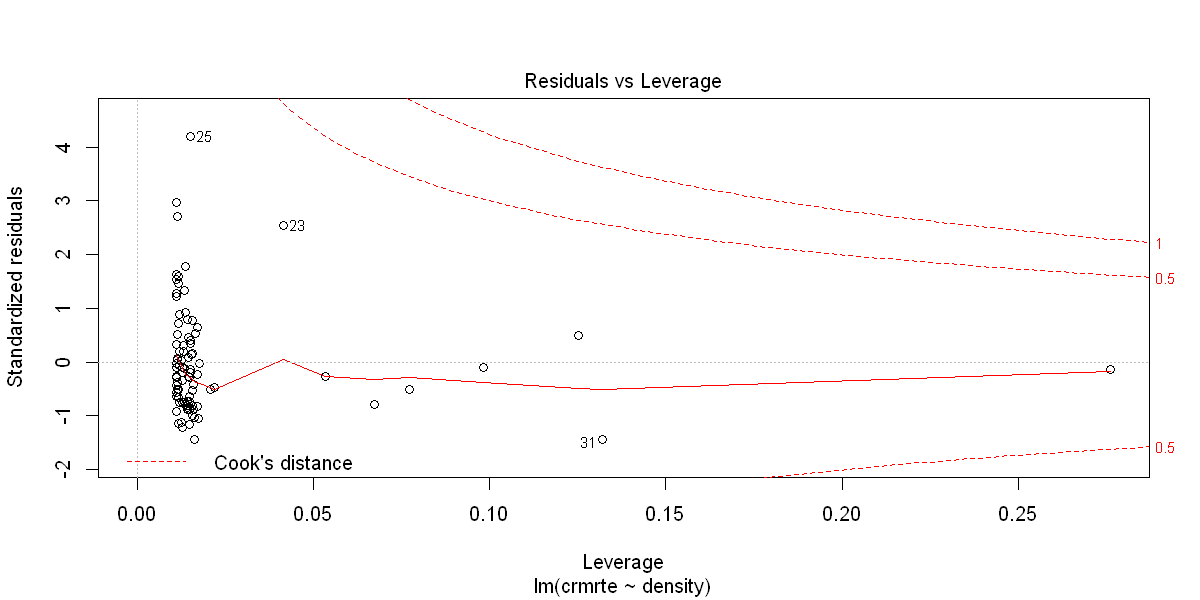

In [39]:
(modelDen <- lm(crmrte ~ density, data = df))
summary(modelDen)
plot(modelDen, which = 5)
diag(vcov(modelDen))

In [43]:
var(df$taxPct, df$density)
var(df$taxpc, df$density)

[1] 0.005150634

[1] 6.381069


Call:
lm(formula = crmrte ~ taxPct + density, data = df)

Coefficients:
(Intercept)       taxPct      density  
   0.007899     0.110913     0.008805  



Call:
lm(formula = crmrte ~ taxPct + density, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020089 -0.007873 -0.002402  0.003366  0.041301 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0078987  0.0041275   1.914  0.05891 .  
taxPct      0.1109131  0.0329112   3.370  0.00112 ** 
density     0.0088052  0.0008562  10.284  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01226 on 88 degrees of freedom
Multiple R-squared:  0.585,	Adjusted R-squared:  0.5755 
F-statistic: 62.01 on 2 and 88 DF,  p-value: < 2.2e-16


(Intercept)       taxPct      density 
1.703616e-05 1.083149e-03 7.330827e-07

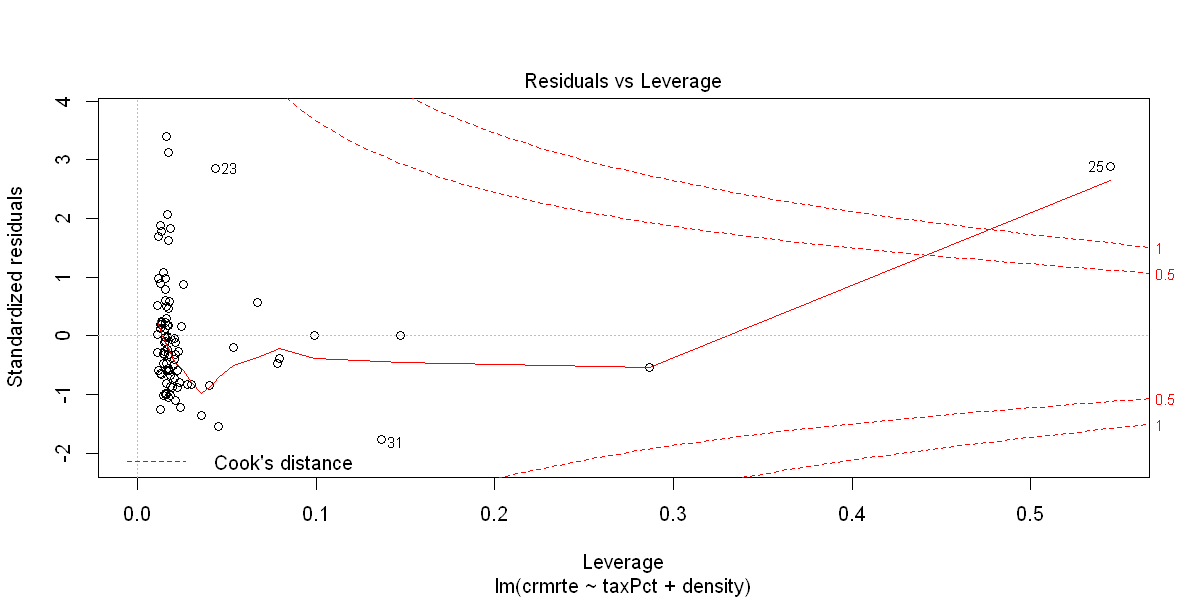

In [40]:
(modelTaxDen <- lm(crmrte ~ taxPct + density, data = df))
summary(modelTaxDen)
plot(modelTaxDen, which = 5)
diag(vcov(modelTaxDen))


Call:
lm(formula = crmrte ~ taxpc + density, data = df)

Coefficients:
(Intercept)        taxpc      density  
  0.0086418    0.0003469    0.0080892  



Call:
lm(formula = crmrte ~ taxpc + density, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.016381 -0.007796 -0.002590  0.003815  0.042033 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0086418  0.0039796   2.172  0.03258 *  
taxpc       0.0003469  0.0001045   3.319  0.00132 ** 
density     0.0080892  0.0009026   8.962 4.92e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01228 on 88 degrees of freedom
Multiple R-squared:  0.5835,	Adjusted R-squared:  0.574 
F-statistic: 61.64 on 2 and 88 DF,  p-value: < 2.2e-16


(Intercept)        taxpc      density 
1.583686e-05 1.092594e-08 8.147200e-07

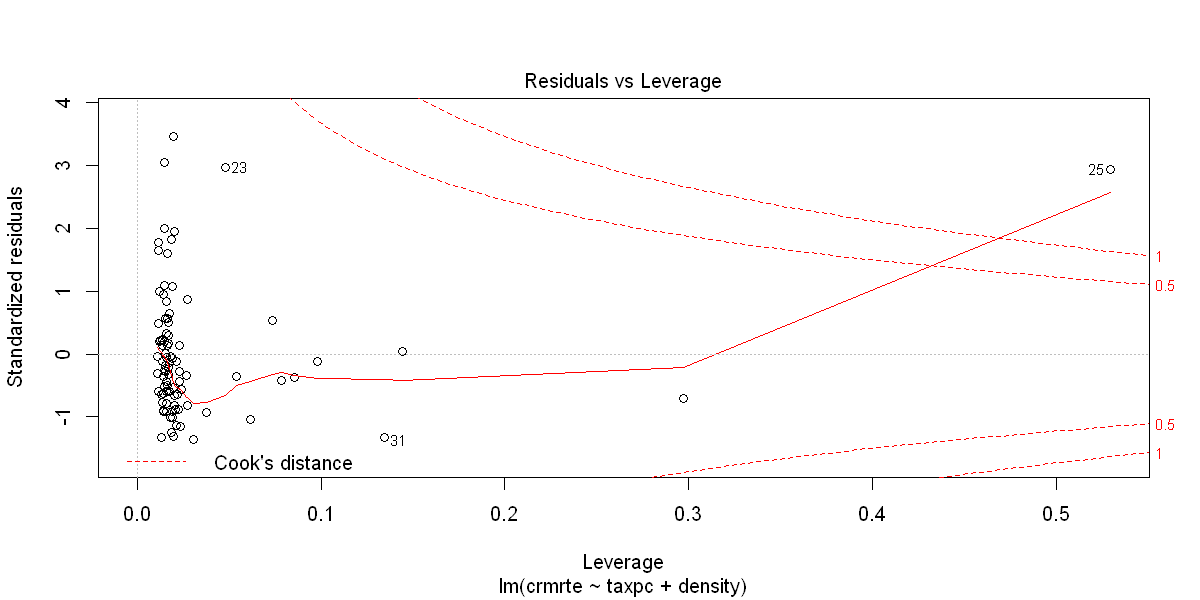

In [41]:
(modelTaxDen2 <- lm(crmrte ~ taxpc + density, data = df))
summary(modelTaxDen2)
plot(modelTaxDen2, which = 5)
diag(vcov(modelTaxDen2))

#### One model that includes key explanatory variables and only covariates that you believe increase the accuracy of your results without introducing substantial bias (for example, you should not include outcome variables that will absorb some of the causal effect you are interested in). This model should strike a balance between accuracy and parsimony and reflect your best understanding of the determinants of crime.

#### One model that includes the previous covariates, and most, if not all, other covariates. A key purpose of this model is to demonstrate the robustness of your results to model specification.

In [ ]:
FancyHist <- function(df, var, color = "red", bins = 100, width = 7, whRatio = 2/5){
    w_h_ratio = whRatio
    width = width
    options(repr.plot.width=width, repr.plot.height=width*whRatio)
    #Takes a data frame and a string variable name in that data frame and produces a histogram of it
    varMean = mean(df[,var])
    varSD = sd(df[,var])
    
    return(
        ggplot(df, aes_string(var)) +
          geom_histogram(bins=bins, fill=color, color="black") + 
          geom_vline(aes(xintercept = varMean), colour="black", size = 1) + 
          geom_vline(aes(xintercept = varMean-varSD), colour="black", size = 0.5, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean+varSD), colour="black", size = 0.5, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean-2*varSD), colour="gray", size = 0.75, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean+2*varSD), colour="darkgray", size = 0.75, linetype="dashed") +
          ggtitle(paste("Histogram of ", var))
    )
}